
# Exercise 5: Polya Process and Technology Adoption

In the first part of this exercise you will implement the linear and non-linear polya process. 
In the second part you will implement a model for technology adoption based on non-linear polya processes, as described in lecture 6.

## Task 1


Implement an agent class suitable for the linear and non-linear Polya process. 
The class should have 
 - a parameter to store the choice of the agent (either 0 or 1),
 - a method to initialise agents, 
 - a method that permits to pick between a linear and non-linear decision,
 - two methods that allow the agent to choose its state based on the choices of agents already there


Choose the parametrization $\theta_i = 0.5$ for both the linear and non-linear process, $\beta_L = 4$ and $\beta_{NL} = 10$ for the linear and the non-linear process respectively.

Implement a Model class suitable for the linear and non-linear Polya process. 
This class sould have 
 - a method to initialize the model with two agents: one having chosen 0 and one having chosen 1
 - a method to compute the global frequency

In [12]:
from model import PolyaProcess
import matplotlib.pyplot as plt
import numpy as np

## Task 2

Your task now is to simulate the linear Polya process.
Run the simulation for **200** time steps and plot **10** sample runs on one plot.

In [29]:
num_steps = 200
num_sample = 10

In [30]:

def task2():
    seed = 42
    np.random.seed(seed)
    plt.figure()
    for _ in range(num_sample):
        my_model = PolyaProcess(model_type="linear", max_steps=num_steps)
        for _ in range(my_model.max_steps):
            my_model.step()
        frequencies = my_model.datacollector.get_model_vars_dataframe()["f_1"].values[0]
        plt.plot(frequencies)

    
    plt.xlabel("Time ($N$)")
    plt.ylabel("$f^1(N)$")
    plt.ylim(0,1)
    plt.grid()
    plt.show()

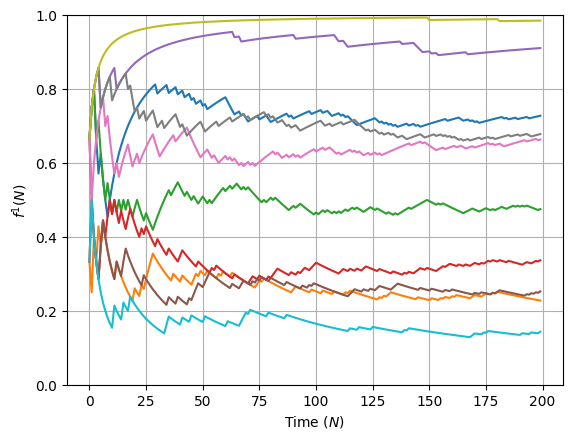

In [31]:
task2()

## Task 3

Your task now is to simulate the non-linear Polya process.
Run the simulation for **200** time steps and plot **10** sample runs on one plot.

In [32]:
num_steps = 200
num_sample = 10

In [33]:
def task3(seed = 120):
    np.random.seed(seed)
    plt.figure()
    for _ in range(num_sample):
        my_model = PolyaProcess(model_type="nonlinear", max_steps=num_steps)
        for _ in range(my_model.max_steps):
            my_model.step()
        frequencies = my_model.datacollector.get_model_vars_dataframe()["f_1"].values[0]
        plt.plot(frequencies)
    
    plt.xlabel("Time ($N$)")
    plt.ylabel("$f^1(N)$")
    plt.ylim(0,1)
    plt.grid()
    plt.show()

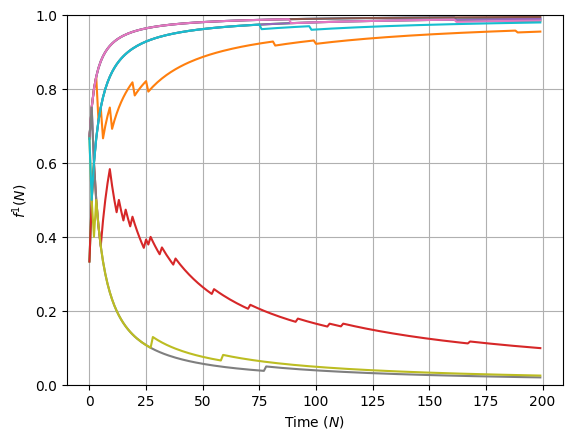

In [34]:
task3()

## Task 4

Now, run $2\,000$ simulations over 500 time steps for both the linear and non-linear polya processes and plot the histogram of the distribution of the fraction of agents choosing 1 at the end (i.e., after the 500 time steps). You should observe a uniform distribution for the linear polya process, and a bimodal distribution for the non-linear polya process.


In [35]:
num_steps = 500
num_sample = 2000

In [56]:
def task4():
    linear_model = PolyaProcess(model_type="linear", max_steps=num_steps)
    nonlinear_model = PolyaProcess(model_type="nonlinear", max_steps=num_steps)
    fig, axs = plt.subplots(1, 2)
    linear_last_f_1s = []
    nonlinear_last_f_1s = []
    for _ in range(num_sample):
        linear_model = PolyaProcess(model_type="linear", max_steps=num_steps)
        nonlinear_model = PolyaProcess(model_type="nonlinear", max_steps=num_steps)
        for _ in range(linear_model.max_steps):
            linear_model.step()
            nonlinear_model.step()

        linear_last_f_1s.append(linear_model.datacollector.get_model_vars_dataframe()["f_1"].values[0][-1])
        nonlinear_last_f_1s.append(nonlinear_model.datacollector.get_model_vars_dataframe()["f_1"].values[0][-1])

    axs[0].hist(linear_last_f_1s)
    axs[0].set_title("Linear Polya Process")
    axs[1].hist(nonlinear_last_f_1s)
    axs[1].set_title("Nonlinear Polya Process")
    plt.xlabel("$f^1(N)$ after "+str(num_steps)+" time steps")
    plt.ylabel("Number of occurrences")
    fig.tight_layout()
    plt.show()

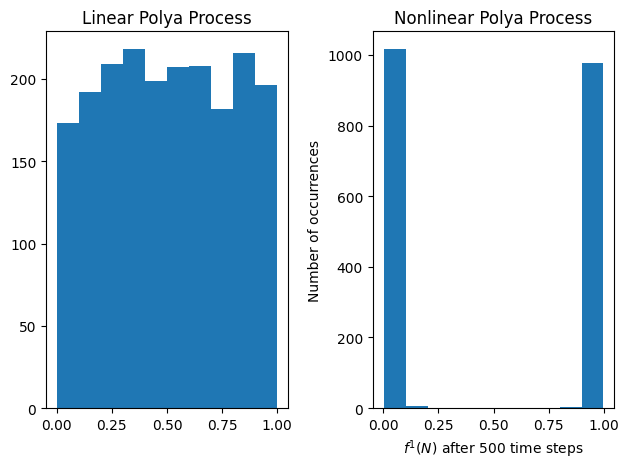

In [57]:
task4()

### Task 5

In this task, you have to implement the models for technology adoption described in the second part of lecture 06. 
To do so, you have to redefine the agent class including the parameters to compute their utilities by adding
 - a method to compute agent utilities using their benefits assigned from preferences (cf. slide 18)
 - a method to compute agent utilities using their benefits assigned from technologies, (cf. slide 33)
 
Also, you have to redefine the PolyaProcess model such that it can now pass the benefits to the agents when initializing them. And set to zero the number of initial agents.



### Task 6

For the technology adoption model with benefits assigned from preferences, run it with the parameters used in slides 27/28.
Try to obtain the figure in slide 29 and 30, i.e. that the simulation evolve inside the lock-in boundaries. Note that it is not easy to obtain a simulation that stays in between the boundaries as most of simulations will quickly lock in. If you want to obtain scuh type of realizations, you will have to fine tune the random seed.

In [ ]:
num_steps = ...
num_sample = ...
A = ...
uc = ...

In [ ]:
def task6():
    ...


In [ ]:
task6()

### Task 7

For the technology adoption model with benefits assigned from technolgoies, run it with the parameters used in slide 30.
Note that it is not easy to obtain a simulation that stays in between the boundaries as most of simulations will quickly lock in. If you want to obtain scuh type of realizations, you will have to fine tune the random seed.

In [ ]:
num_steps = ...
num_sample = ...
A = ...
uc = ...

In [ ]:
def task7():
    ...


In [ ]:
task7()